# Step 1 Import required libraries

In [2]:
# Import basic libraries for data handling and numerical operations
import pandas as pd
import numpy as np

# Import tools from scikit-learn (sklearn) for splitting data, scaling features, 
# building KNN model and computing evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')


# Step 2 Load the dataset

In [4]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("diabetes.csv")

# Show the number of rows and columns and the first 5 rows to inspect the data
print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows of the dataset:\n")
print(df.head())


Dataset shape (rows, columns): (768, 9)

First 5 rows of the dataset:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


# Step 3 Understand columns and check for missing values

In [5]:
# Print column names and a concise summary of null values
print("\nColumn names:\n", df.columns.tolist())

print("\nChecking for missing values (count per column):")
print(df.isnull().sum())

# Show basic statistics (mean, std, min, max) to understand ranges
print("\nSummary statistics of features:")
print(df.describe())



Column names:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']

Checking for missing values (count per column):
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

Summary statistics of features:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
m

# Step 4 Prepare features (X) and target (y)

In [6]:
# Separate input features and target variable
X = df.drop("Outcome", axis=1)  # all columns except 'Outcome' are features
y = df["Outcome"]               # 'Outcome' is the label: 0 (no diabetes) or 1 (diabetes)

# Print shapes to confirm separation
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Print the first row of X and corresponding y to see how they look
print("\nFirst row of features:\n", X.iloc[0])
print("\nCorresponding label:", y.iloc[0])


Shape of X (features): (768, 8)
Shape of y (target): (768,)

First row of features:
 Pregnancies        6.000
Glucose          148.000
BloodPressure     72.000
SkinThickness     35.000
Insulin            0.000
BMI               33.600
Pedigree           0.627
Age               50.000
Name: 0, dtype: float64

Corresponding label: 1


# Step 5 Split into training and test sets

In [7]:
# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print sizes of splits
print("Training feature shape:", X_train.shape)
print("Test feature shape    :", X_test.shape)
print("Training labels shape :", y_train.shape)
print("Test labels shape     :", y_test.shape)


Training feature shape: (614, 8)
Test feature shape    : (154, 8)
Training labels shape : (614,)
Test labels shape     : (154,)


# Step 6 Feature scaling (Standardization)

In [8]:
# Create the scaler and apply standardization
scaler = StandardScaler()

# Fit the scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler (learned from training data) to transform test data
X_test_scaled = scaler.transform(X_test)

# Step 7 Build and train the KNN model

In [9]:
# Create the KNN classifier with k neighbors (k = 5 is common starting point)
knn = KNeighborsClassifier(n_neighbors=5)

# Train (fit) the KNN on the scaled training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [10]:
# Use the trained model to predict labels of test set
y_pred = knn.predict(X_test_scaled)

# Show first 20 predicted labels and the corresponding true labels side by side for quick comparison
print("Predicted labels (first 20):", y_pred[:20])
print("True labels      (first 20):", y_test.values[:20])

Predicted labels (first 20): [1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0]
True labels      (first 20): [0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0]


# Step 8 Compute evaluation metrics

In [11]:
# Calculate confusion matrix and the requested metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the confusion matrix and metrics
print("Confusion Matrix:\n", cm)
print(f"\nAccuracy  : {accuracy:.4f}")   # .4f limits to 4 decimal places
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")


Confusion Matrix:
 [[80 20]
 [26 28]]

Accuracy  : 0.7013
Error Rate: 0.2987
Precision : 0.5833
Recall    : 0.5185


# Step 9 Show confusion matrix layout with labels

In [12]:
# Nicely print counts with labels for clarity
tn, fp, fn, tp = cm.ravel()  # unpack confusion matrix values

print("\nConfusion matrix details:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives(FP): {fp}")
print(f"False Negatives(FN): {fn}")
print(f"True Positives (TP): {tp}")



Confusion matrix details:
True Negatives (TN): 80
False Positives(FP): 20
False Negatives(FN): 26
True Positives (TP): 28


# Visualization 

In [13]:
import matplotlib.pyplot as plt   # for general plotting
import seaborn as sns             # for advanced, prettier plots


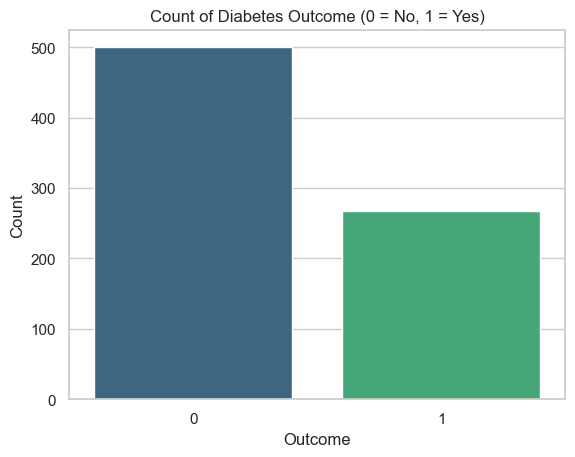

In [15]:
# Set a clean style for plots
sns.set(style="whitegrid")

# Create the count plot
sns.countplot(x="Outcome", data=df, palette="viridis")

# Add title and labels
plt.title("Count of Diabetes Outcome (0 = No, 1 = Yes)")
plt.xlabel("Outcome")
plt.ylabel("Count")

# Show the plot
plt.show()
